### Load libraries

In [1]:
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

import matplotlib.pyplot as plt

### Load data

In [2]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/adv-train",
    filters={"tags": {"$in": ["try1.2", "try1.2.1", "try1.3", "try1.3.3"]}},
)


def flatten_dict(d: dict, prefix: str = "") -> dict:
    ret = dict()
    for k, v in d.items():
        if isinstance(v, dict):
            ret |= flatten_dict(v, prefix=f"{k}_")
        else:
            ret[f"{prefix}{k}"] = v
    return ret


df_all = pd.DataFrame(
    [
        flatten_dict(r.summary._json_dict)  # type: ignore
        | flatten_dict(r.config)
        | {"name": r.name, "state": r.state}
        for r in runs
    ]
)
df_all.columns

df = df_all[df_all.state == "finished"]

In [3]:
print(sorted(df.n_train.unique()))

[4, 10, 20, 50, 80, 100, 200, 300, 500, 1000, 2000, 5000, 10000, 20000, 50000, 200000, 500000, 2000000, 5942688]


### CIFAR-5m Plots

In [4]:
adv_df = df[df.do_adv_training & df.dataset.isna()]

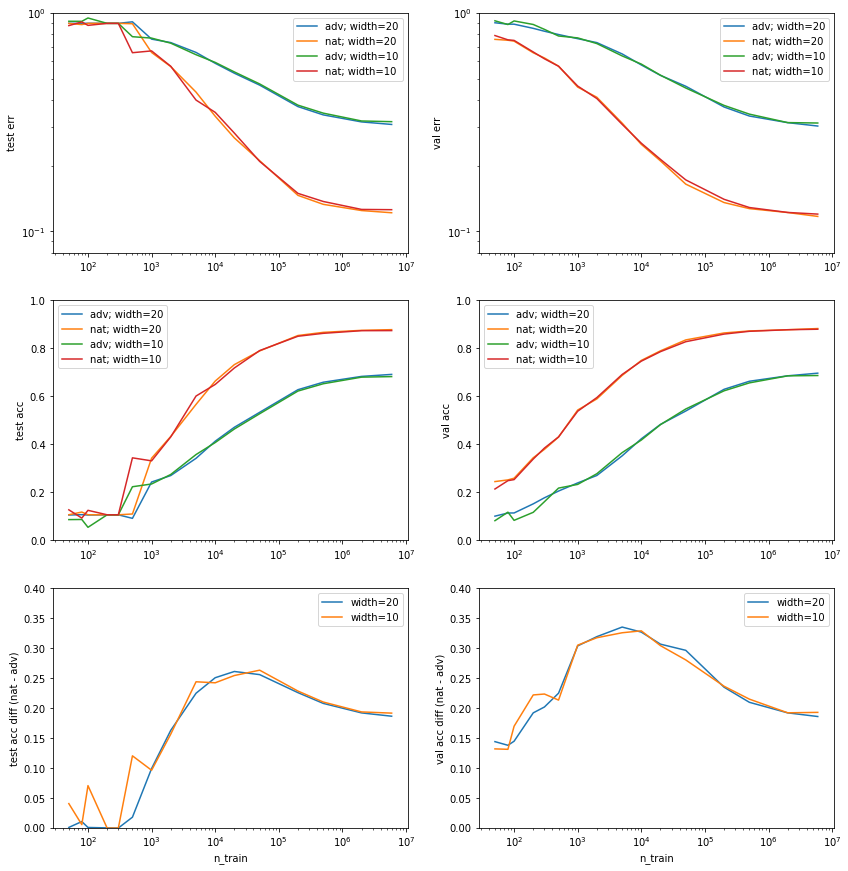

In [5]:
plt.figure(figsize=(14, 15))

plt.subplot(3, 2, 1)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, 1 - cdf.test_acc_adv, label=f"adv; {width=}")
    plt.plot(cdf.n_train, 1 - cdf.test_acc_nat, label=f"nat; {width=}")
plt.ylim(0.08, 1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("test err")
plt.legend()

plt.subplot(3, 2, 2)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, 1 - cdf.val_acc_adv_max, label=f"adv; {width=}")
    plt.plot(cdf.n_train, 1 - cdf.val_acc_nat_max, label=f"nat; {width=}")
plt.ylim(0.08, 1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("val err")
plt.legend();

plt.subplot(3, 2, 3)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_adv, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.test_acc_nat, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("test acc")
plt.legend()

plt.subplot(3, 2, 4)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_adv_max, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("val acc")
plt.legend()

plt.subplot(3, 2, 5)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_nat - cdf.test_acc_adv, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("test acc diff (nat - adv)")
plt.legend()

plt.subplot(3, 2, 6)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max - cdf.val_acc_adv_max, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("val acc diff (nat - adv)")
plt.legend();


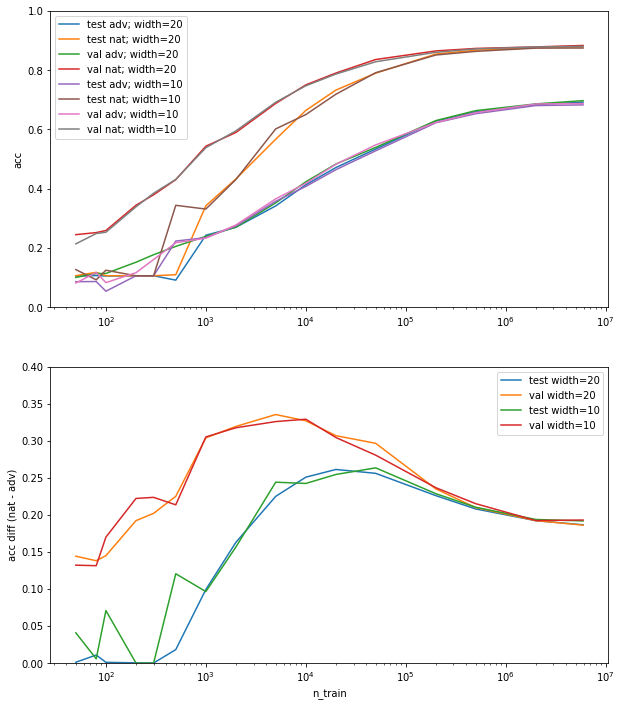

In [6]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")

    plt.plot(cdf.n_train, cdf.test_acc_adv, label=f"test adv; {width=}")
    plt.plot(cdf.n_train, cdf.test_acc_nat, label=f"test nat; {width=}")

    plt.plot(cdf.n_train, cdf.val_acc_adv_max, label=f"val adv; {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max, label=f"val nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("acc")
plt.legend()

plt.subplot(2, 1, 2)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_acc_nat - cdf.test_acc_adv, label=f"test {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max - cdf.val_acc_adv_max, label=f"val {width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("acc diff (nat - adv)")
plt.legend();

### CIFAR-10 Plots

In [7]:
adv_df = df[df.do_adv_training & (df.dataset == "DatasetT.CIFAR10")]

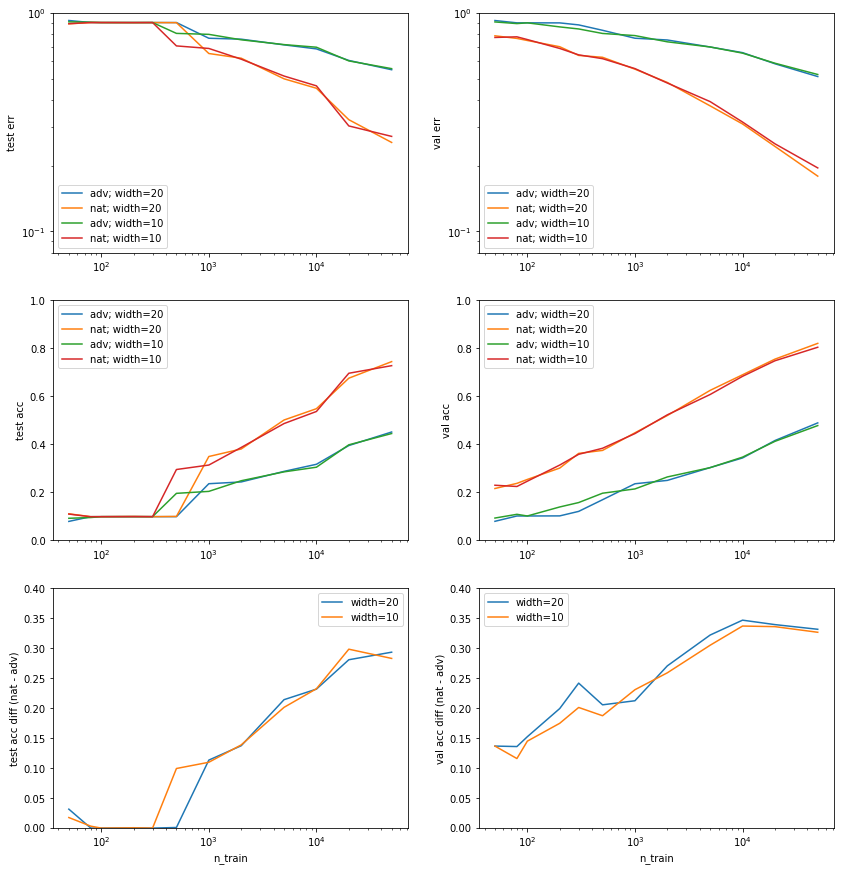

In [8]:
plt.figure(figsize=(14, 15))

plt.subplot(3, 2, 1)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, 1 - cdf.test_orig_acc_adv, label=f"adv; {width=}")
    plt.plot(cdf.n_train, 1 - cdf.test_orig_acc_nat, label=f"nat; {width=}")
plt.ylim(0.08, 1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("test err")
plt.legend()

plt.subplot(3, 2, 2)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, 1 - cdf.val_acc_adv_max, label=f"adv; {width=}")
    plt.plot(cdf.n_train, 1 - cdf.val_acc_nat_max, label=f"nat; {width=}")
plt.ylim(0.08, 1)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("val err")
plt.legend();

plt.subplot(3, 2, 3)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_orig_acc_adv, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.test_orig_acc_nat, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("test acc")
plt.legend()

plt.subplot(3, 2, 4)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_adv_max, label=f"adv; {width=}")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max, label=f"nat; {width=}")
plt.ylim(0, 1)
plt.xscale("log")
plt.ylabel("val acc")
plt.legend()

plt.subplot(3, 2, 5)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.test_orig_acc_nat - cdf.test_orig_acc_adv, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("test acc diff (nat - adv)")
plt.legend()

plt.subplot(3, 2, 6)
for width in adv_df.width.unique():
    cdf = adv_df[adv_df.width == width].sort_values("n_train")
    plt.plot(cdf.n_train, cdf.val_acc_nat_max - cdf.val_acc_adv_max, label=f"{width=}")
plt.ylim(0, 0.4)
plt.xscale("log")
plt.xlabel("n_train")
plt.ylabel("val acc diff (nat - adv)")
plt.legend();


### CIFAR-10 and CIFAR-5m combined

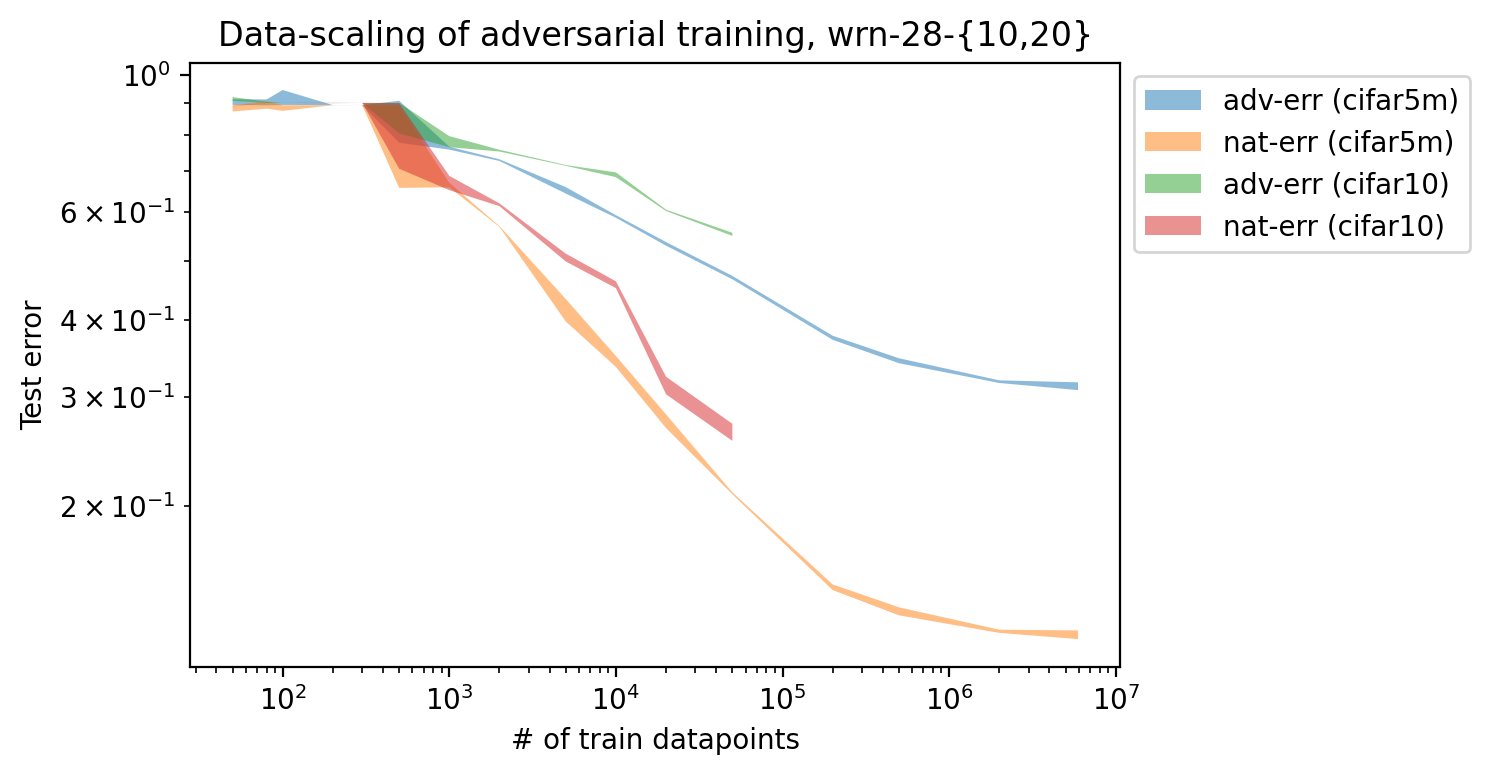

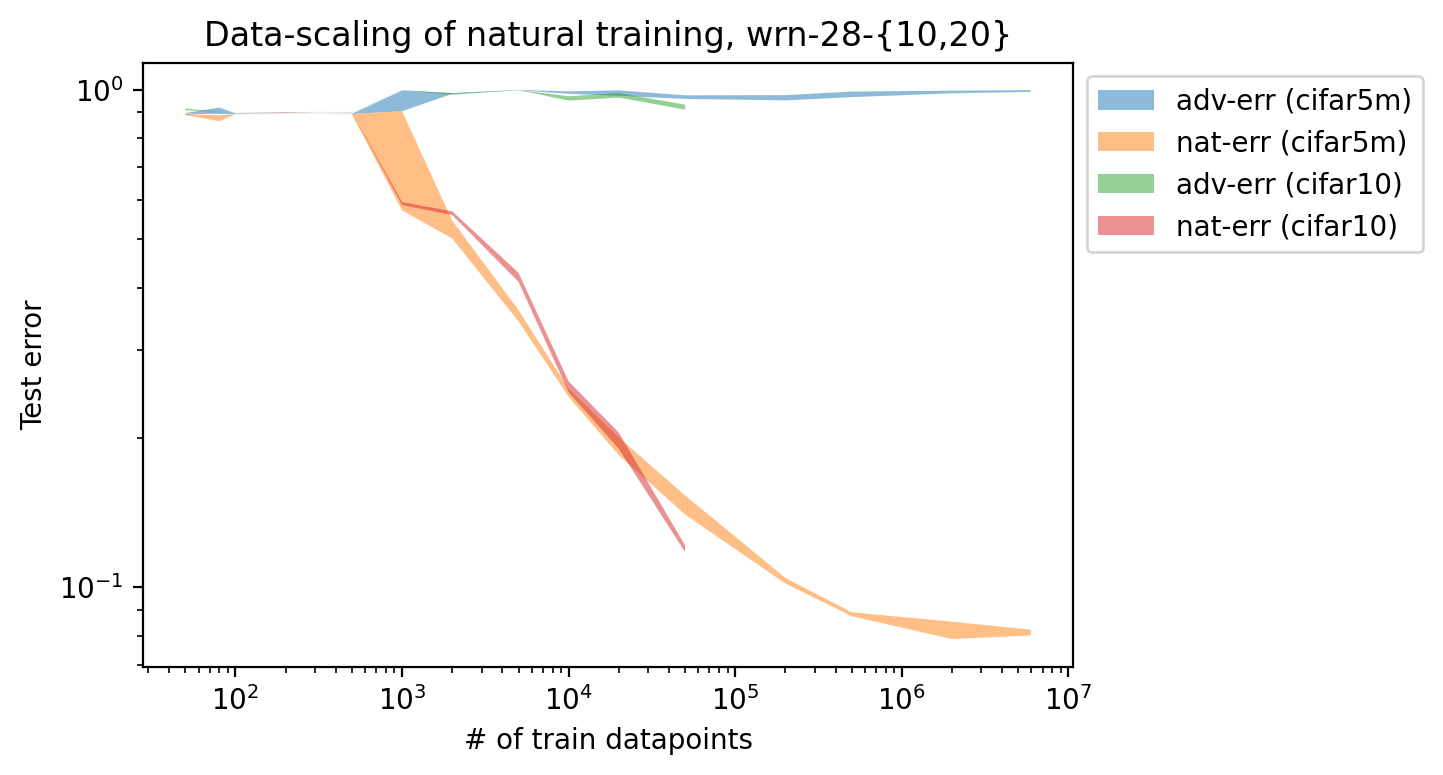

In [9]:
def plot_zone(xs: pd.Series, ys1: pd.Series, ys2: pd.Series, **kwargs):
    plt.fill_between(
        xs.to_numpy(),
        np.minimum(ys1.to_numpy(), ys2.to_numpy()),
        np.maximum(ys1.to_numpy(), ys2.to_numpy()),
        **kwargs
    )

for adv_train in [True, False]:
    plt.figure(dpi=200, figsize=(6, 4))
    train_type = "adversarial" if adv_train else "natural"
    plt.title(f"Data-scaling of {train_type} training, wrn-28-{{10,20}}")

    df_c5m = df[(df.do_adv_training == adv_train) & df.dataset.isna()]
    df_c10 = df[(df.do_adv_training == adv_train) & (df.dataset == "DatasetT.CIFAR10")]

    cdf10 = df_c5m[df_c5m.width == 10].sort_values("n_train")
    cdf20 = df_c5m[df_c5m.width == 20].sort_values("n_train")
    plot_zone(cdf10.n_train, 1 - cdf10.test_acc_adv, 1 - cdf20.test_acc_adv, label=f"adv-err (cifar5m)", alpha=0.5)
    plot_zone(cdf10.n_train, 1 - cdf10.test_acc_nat, 1 - cdf20.test_acc_nat, label=f"nat-err (cifar5m)", alpha=0.5)

    cdf10 = df_c10[df_c10.width == 10].sort_values("n_train")
    cdf20 = df_c10[df_c10.width == 20].sort_values("n_train")
    plot_zone(cdf10.n_train, 1 - cdf10.test_orig_acc_adv, 1 - cdf20.test_orig_acc_adv, label=f"adv-err (cifar10)", alpha=0.5)
    plot_zone(cdf10.n_train, 1 - cdf10.test_orig_acc_nat, 1 - cdf20.test_orig_acc_nat, label=f"nat-err (cifar10)", alpha=0.5)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel("# of train datapoints")
    plt.ylabel("Test error")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1));
